In [1]:
# Import required libraries
import random
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon

## Problem 1a: Coin Toss Simulation
def coin_toss_simulation(trials=10000):
    heads = 0
    tails = 0

    for _ in range(trials):
        result = random.choice(['H', 'T'])
        if result == 'H':
            heads += 1
        else:
            tails += 1

    p_heads = heads / trials
    p_tails = tails / trials

    print(f"Experimental probability of heads: {p_heads:.4f}")
    print(f"Experimental probability of tails: {p_tails:.4f}")
    return p_heads, p_tails

# Run the simulation
print("Problem 1a: Coin Toss Simulation")
coin_toss_simulation()

Problem 1a: Coin Toss Simulation
Experimental probability of heads: 0.5002
Experimental probability of tails: 0.4998


(0.5002, 0.4998)

**Problem 1a Explanation: Coin Toss Simulation**  
Simulates 10,000 coin tosses using Python's random module

Counts the number of heads and tails

Calculates experimental probabilities by dividing counts by total trials

Shows that as trials increase, experimental probability approaches theoretical (0.5)

In [2]:
## Problem 1b: Dice Roll Simulation (Sum of 7)
def dice_sum_simulation(trials=10000):
    count_7 = 0

    for _ in range(trials):
        die1 = random.randint(1, 6)
        die2 = random.randint(1, 6)
        if die1 + die2 == 7:
            count_7 += 1

    probability = count_7 / trials
    print(f"\nProblem 1b: Probability of sum being 7: {probability:.4f}")
    return probability

dice_sum_simulation()


Problem 1b: Probability of sum being 7: 0.1663


0.1663

**Problem 1b Explanation: Dice Roll Simulation**  
Simulates rolling two dice 10,000 times

Counts how often the sum equals 7

Calculates the probability by dividing count by trials

Theoretical probability is 6/36 = 0.1667 (6 combinations out of 36 possible)

In [3]:
## Problem 2: At least one six in 10 rolls
def at_least_one_six(trials=10000):
    successes = 0

    for _ in range(trials):
        rolls = [random.randint(1, 6) for _ in range(10)]
        if 6 in rolls:
            successes += 1

    probability = successes / trials
    print(f"\nProblem 2: Probability of at least one 6 in 10 rolls: {probability:.4f}")
    return probability

at_least_one_six()


Problem 2: Probability of at least one 6 in 10 rolls: 0.8362


0.8362

**Problem 2 Explanation: At Least One Six**  
Simulates rolling a die 10 times, repeated for 10,000 trials

Counts trials where at least one roll was a 6

Calculates probability as successful trials divided by total trials

Theoretical probability is 1 - (5/6)^10 ≈ 0.8385

In [4]:
## Problem 3: Conditional Probability and Bayes' Theorem
def ball_simulation(trials=1000):
    # Initialize counts
    red_after_blue = 0
    blue_count = 0

    previous_color = None

    for _ in range(trials):
        # Draw a ball (with replacement)
        ball = random.choices(['R', 'G', 'B'], weights=[5, 7, 8])[0]

        # Check condition: previous ball was blue
        if previous_color == 'B':
            blue_count += 1
            if ball == 'R':
                red_after_blue += 1

        previous_color = ball

    # Calculate conditional probability
    if blue_count > 0:
        p_red_given_blue = red_after_blue / blue_count
    else:
        p_red_given_blue = 0

    # Theoretical probability using Bayes' theorem
    # P(R|B) = P(B|R)*P(R)/P(B) but since independent, P(R|B) = P(R) = 5/20
    theoretical_prob = 5 / 20

    print(f"\nProblem 3a: Experimental P(Red|Blue): {p_red_given_blue:.4f}")
    print(f"Theoretical P(Red|Blue): {theoretical_prob:.4f}")

    return p_red_given_blue, theoretical_prob

ball_simulation()


Problem 3a: Experimental P(Red|Blue): 0.2531
Theoretical P(Red|Blue): 0.2500


(0.2531017369727047, 0.25)

**Problem 3 Explanation: Conditional Probability**  
Simulates drawing balls from a bag with replacement

Tracks cases where a red follows a blue

Calculates conditional probability P(Red|Blue)

Since draws are independent, theoretical probability is just P(Red) = 5/20 = 0.25

In [5]:
## Problem 4: Discrete Random Variable
def discrete_distribution():
    # Define the distribution
    values = [1, 2, 3]
    probabilities = [0.25, 0.35, 0.4]

    # Generate sample
    sample = np.random.choice(values, size=1000, p=probabilities)

    # Calculate statistics
    mean = np.mean(sample)
    variance = np.var(sample)
    std_dev = np.std(sample)

    print(f"\nProblem 4: Discrete Random Variable")
    print(f"Sample mean: {mean:.4f}")
    print(f"Sample variance: {variance:.4f}")
    print(f"Sample standard deviation: {std_dev:.4f}")

    return sample, mean, variance, std_dev

sample, mean, variance, std_dev = discrete_distribution()



Problem 4: Discrete Random Variable
Sample mean: 2.1270
Sample variance: 0.6169
Sample standard deviation: 0.7854


**Problem 4 Explanation: Discrete Random Variable**  
Generates 1000 samples from a discrete distribution (X=1:25%, X=2:35%, X=3:40%)

Calculates sample mean, variance, and standard deviation

Compares with theoretical values (Mean=2.15, Var≈0.7275)

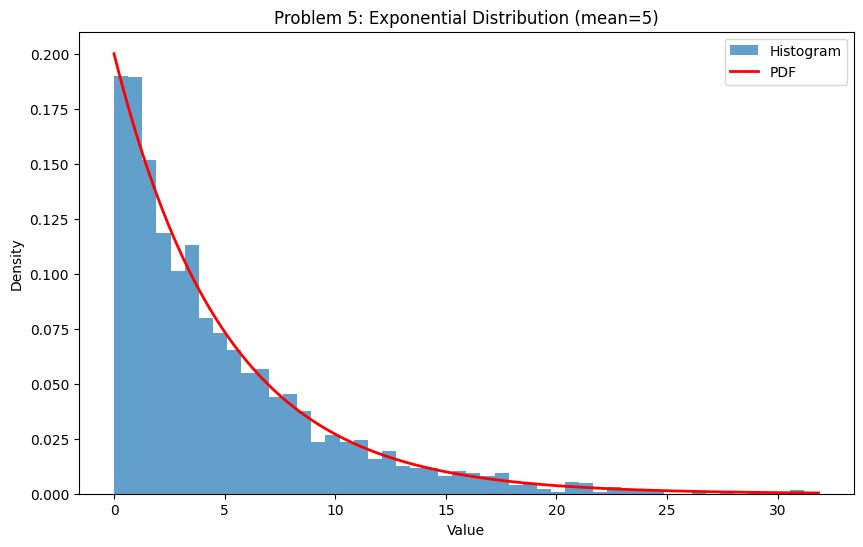

In [6]:
## Problem 5: Exponential Distribution
def exponential_simulation():
    # Generate samples
    sample = np.random.exponential(scale=5, size=2000)

    # Plot histogram
    plt.figure(figsize=(10, 6))
    plt.hist(sample, bins=50, density=True, alpha=0.7, label='Histogram')

    # Plot PDF
    x = np.linspace(0, max(sample), 1000)
    plt.plot(x, expon.pdf(x, scale=5), 'r-', lw=2, label='PDF')

    plt.title('Problem 5: Exponential Distribution (mean=5)')
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.legend()
    plt.show()

    return sample

exp_sample = exponential_simulation()


**Problem 5 Explanation: Exponential Distribution**  
Generates 2000 samples from exponential distribution with mean=5

Plots histogram of the samples

Overlays the theoretical probability density function

Shows how empirical distribution matches theoretical

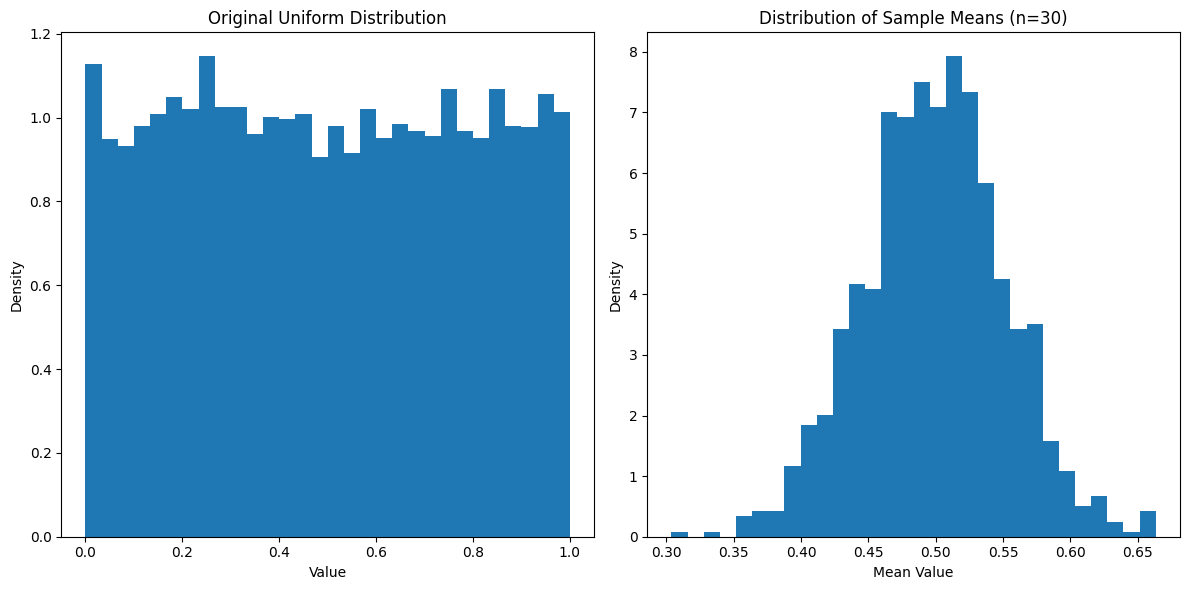

In [7]:
## Problem 6: Central Limit Theorem
def central_limit_theorem():
    # Generate uniform distribution
    uniform_data = np.random.uniform(0, 1, 10000)

    # Draw samples and calculate means
    sample_means = []
    for _ in range(1000):
        sample = np.random.choice(uniform_data, size=30)
        sample_means.append(np.mean(sample))

    # Plot original uniform distribution
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.hist(uniform_data, bins=30, density=True)
    plt.title('Original Uniform Distribution')
    plt.xlabel('Value')
    plt.ylabel('Density')

    # Plot distribution of sample means
    plt.subplot(1, 2, 2)
    plt.hist(sample_means, bins=30, density=True)
    plt.title('Distribution of Sample Means (n=30)')
    plt.xlabel('Mean Value')
    plt.ylabel('Density')

    plt.tight_layout()
    plt.show()

    return uniform_data, sample_means

uniform_data, sample_means = central_limit_theorem()


**Problem 6 Explanation: Central Limit Theorem**  
Generates 10,000 uniform random numbers (U(0,1))

Takes 1000 samples of size n=30 from this population

Calculates means of each sample

Shows distribution of sample means is approximately normal (CLT)

Compares original uniform distribution with sampling distribution of means